In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
wine=pd.read_csv("\\Users\\piyus\\Downloads\\wine.csv")

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_=wine.iloc[:,1:]

In [5]:
wine_.shape

(178, 13)

In [6]:
wine_.dtypes

Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [7]:
wine_.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
#scaling the data using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
wine_s=scale.fit_transform(wine_.iloc[:,0:])
wine_s

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [9]:
# pca
from sklearn.decomposition import PCA
pca=PCA()
pca_value=pca.fit_transform(wine_s)
pca_value

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [10]:
var=pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [11]:
cum=np.cumsum(np.round(var,decimals= 4)*100)
cum

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

In [12]:
# using first three principal component for clustering
columns=pca_value[:,0:3]
columns

array([[-7.06335756e-01, -2.53192753e-01,  2.40926932e-02],
       [-4.84976802e-01, -8.82289142e-03, -2.80482048e-01],
       [-5.21172266e-01, -1.89187222e-01,  1.96216736e-01],
       [-8.21643663e-01, -5.80905512e-01,  8.11097172e-02],
       [-2.02546382e-01, -5.94665740e-02,  3.00239941e-01],
       [-6.08190152e-01, -4.87519191e-01, -7.54332321e-02],
       [-5.44047399e-01, -3.00196497e-01, -1.05074621e-01],
       [-4.74357495e-01, -2.98197021e-01, -2.82149308e-03],
       [-5.00432012e-01, -3.07602859e-01, -2.30493613e-01],
       [-6.27517969e-01, -2.06328233e-01, -1.14147932e-01],
       [-7.27467157e-01, -3.56512044e-01, -5.04199490e-02],
       [-3.74967744e-01, -2.25424535e-01, -2.86134083e-01],
       [-4.48188283e-01, -2.31938139e-01, -1.67908053e-01],
       [-6.26345329e-01, -3.55138677e-01, -8.58356579e-02],
       [-8.35717011e-01, -5.38047802e-01, -1.15202943e-01],
       [-4.71931568e-01, -3.37405385e-01, -7.27821607e-02],
       [-4.26990905e-01, -4.50842684e-01

# clustering on first three principal component

In [13]:
from sklearn.cluster import KMeans

#elbow method
k_range=range(1,6)
sse= []
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(pca_value)
    sse.append(km.inertia_)
    

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
sse

[95.59953778471066,
 64.53766702389429,
 48.95403581962662,
 44.872171641400435,
 42.16556922054786]

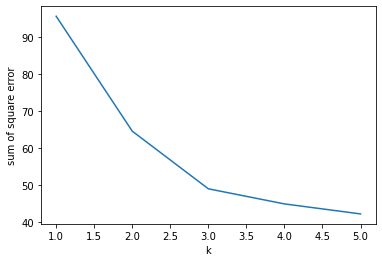

In [15]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_range,sse)

In [16]:
#kmeans cluster
model=KMeans(n_clusters=3)
pred=model.fit_predict(pca_value)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [17]:
wine_df=wine.copy()
wine_df['cluster']=pred
wine_df.iloc[101:135,:]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
101,2,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562,2
102,2,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438,2
103,2,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415,2
104,2,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672,2
105,2,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315,2
106,2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510,2
107,2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488,2
108,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312,2
109,2,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680,2
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,2


In [18]:
wine_df.groupby(wine_df.cluster).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster,,,,,,,,,,,,,,
0,1.033333,13.719333,1.964000,2.456500,17.278333,107.866667,2.845500,2.974833,0.288667,1.927333,5.462667,1.071833,3.157333,1117.816667
1,2.872727,13.099818,3.160909,2.407455,21.043636,98.654545,1.689818,0.847818,0.457818,1.133636,6.936545,0.716836,1.709273,624.854545
2,1.984127,12.229524,1.971111,2.245079,20.253968,92.952381,2.299365,2.160159,0.347778,1.669683,3.032857,1.058571,2.879841,500.174603


# Hierarchical clustering 

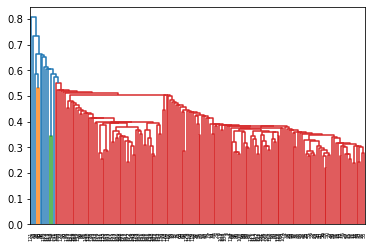

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram=sch.dendrogram(sch.linkage(pca_value,method='single'))
HC=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
y_hc=HC.fit_predict(pca_value)

clusters=pd.DataFrame(y_hc,columns=['Clusters'])


In [20]:
clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,0
174,0
175,0
176,0


# creating cluster on  original  Wine data

In [21]:
#elbow method for best k in KMeans
k_rng=range(1,5)
sse_= []
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(wine_)
    sse_.append(km.inertia_)

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
sse_

[17592296.383508474, 4543749.614531863, 2370689.6867829696, 1331903.0622637176]

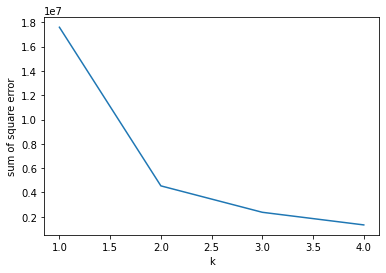

In [23]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_rng,sse_)

In [24]:
# kmeans clustering
model_=KMeans(n_clusters=2)
pred_c=model_.fit_predict(wine_s)
pred_c

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
wine_2=wine_.copy()
wine_2['Clust']=pred_c
wine_2.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [26]:
wine_2.groupby(wine_2.Clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clust,,,,,,,,,,,,,
0,12.876714,2.971143,2.400857,20.984286,97.900000,1.710857,1.010143,0.456000,1.179429,6.058429,0.788229,1.875143,596.014286
1,13.080926,1.924907,2.344259,18.529630,100.935185,2.673796,2.689815,0.300833,1.857593,4.409722,1.067130,3.089074,844.685185


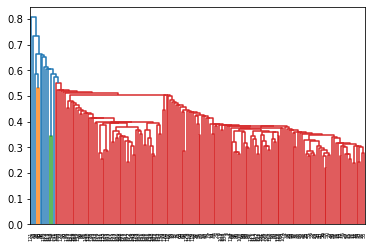

In [27]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram_=sch.dendrogram(sch.linkage(wine_s,method='single'))
HC_=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')
y_hc_=HC_.fit_predict(wine_s)

cluster=pd.DataFrame(y_hc,columns=['Clusters'])


In [28]:
cluster

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,0
174,0
175,0
176,0
